Check Out put cluster right or wrong range (-1,1)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv(r"D:\ML\WsCubeTech\us\clustering\data\iris_csv.csv")
dataset.head(5)

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
sns.pairplot(data=dataset)
plt.show()

In [3]:
from sklearn.cluster import KMeans

In [4]:
wcss = []
for i in range(2,20):
    km = KMeans(n_clusters=i,init="k-means++")
    km.fit(dataset)
    wcss.append(km.inertia_)

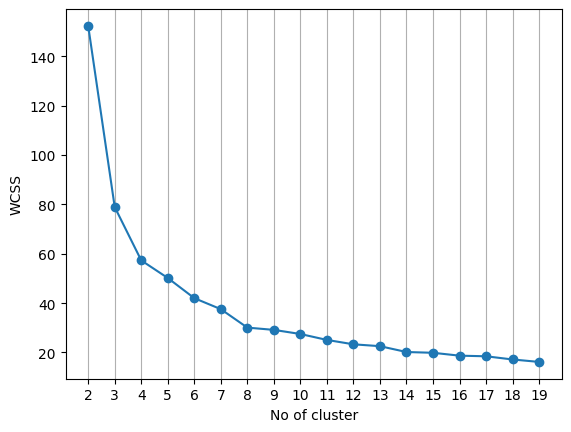

In [5]:
plt.plot([i for i in range(2,20)],wcss,marker="o")
plt.xlabel("No of cluster")
plt.xticks([i for i in range(2,20)])
plt.ylabel("WCSS")
plt.grid(axis="x")
plt.show()

In [6]:
kmn = KMeans(n_clusters=3)
dataset["Pred"] = kmn.fit_predict(dataset)
dataset.head(5)

,sepallength,sepalwidth,petallength,petalwidth,Pred
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [8]:
from sklearn.metrics import silhouette_score

In [9]:
kmn.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [10]:
silhouette_score(dataset,labels=kmn.labels_)

0.6844657470953515

In [11]:
# sns.pairplot(data=dataset,hue="Pred")
# plt.show()

In [14]:
ss = []
no_c = [j for j in range(2,21)]
for i in range(2,21):
    km1 = KMeans(n_clusters=i)
    km1.fit(dataset)
    ss.append(silhouette_score(dataset,km1.labels_))

In [15]:
# ss

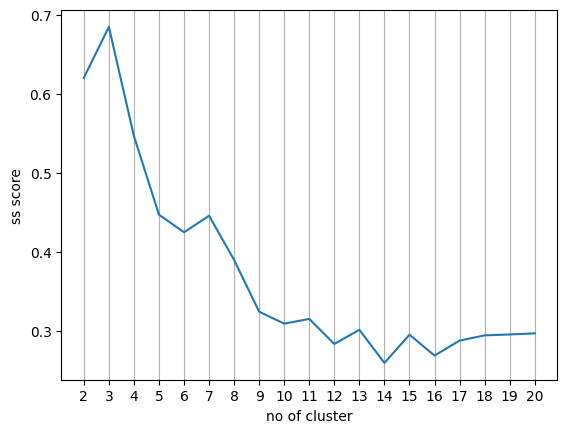

In [20]:
plt.plot(no_c,ss)
plt.xlabel("no of cluster")
plt.ylabel("ss score")
plt.xticks(no_c)
plt.grid(axis="x")
plt.show()